#Data Science Lifecycle
---
##Case Study: Loan Status
**Objective:**
In this exercise, we will explore a dataset of Loan data with the below info. We will try later to predict the status of loan for individuals based the following information.</font>

## DataSet Description

- **Loan_ID:** data set unique ID <br>
- **Gender:** individual gender<br>
- **Married:** individual marital status<br>
- **Dependents:** number of dependents<br>
- **Education:** individual education status<br>
- **Self_Employed:** individual employment status<br>
- **ApplicantIncome:** individual income<br>
- **CoapplicantIncome:** individual Coapplicant income<br>
- **LoanAmount:** Loan amount in thousands<br>
- **Loan_Amount_Term:** term of loan in months<br>
- **Credit_History:** credit history meets guidelines<br>
- **Property_Area:** Urban/ Semi Urban/ Rural<br>
- **Loan_Status:** loan approved (Y/N)<br>

# 1. Import necessary python modules (libraries)
<br>
We will need the following libraries:

- Numpy — for scientific computing (e.g., linear algebra (vectors & matrices)).
- Pandas — providing high-performance, easy-to-use data reading, manipulation, and analysis.
- Matplotlib & seaborn — plotting & visualization.
- scikit-learn — a tool for data mining and machine learning models.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 2. Read & visualize data
To load the data to our code, we use pandas module, more specifically, the read_csv function.

Combine the two dataset in order to apply the same preprocessing steps in both dataframes

In [5]:
df_train=pd.read_csv('../data/train.csv')
df_test=pd.read_csv('../data/test.csv')
df = pd.concat([df_train, df_test], ignore_index=True)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


# 4. Exploratory Data Analysis


In [6]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 2919 rows and 81 columns


##### Using the function info(), we can check:

- data types (int, float, or object (e.g., string))
- missing values
- memory usage
- number of rows and columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

Total number of rows is 614, hence we have missing values in the following columns:
- Credit_History       
- Dependents           
- Gender               
- LoanAmount           
- Loan_Amount_Term             
- Married    
- Self_Employed        

##### Using the function describe(), we can check the following  values for each numerical feature (column)
- mean
- standard deviation
- maximum
- minimum


In [8]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


We can see that Credit_History is actually not a numerical type, but categorical. Let's double check it's unique values.

We can then change the type of credit_history to object since it has 2 values (1,0)

In [9]:
np.sort(df.Credit_History.unique())

AttributeError: 'DataFrame' object has no attribute 'Credit_History'

Loan_Amount_Term is a variable of numerical discrete data type

In [10]:
np.sort(df.Loan_Amount_Term.unique())

AttributeError: 'DataFrame' object has no attribute 'Loan_Amount_Term'

##### Using the function describe(include='o'), we can check the following  values for each categorical feature (column)


In [11]:
df.describe(include='O')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,2915,2919,198,2919,2919,2917,2919,2919,2919,2919,...,2762,2760,2760,2760,2919,10,571,105,2918,2919
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,2265,2907,120,1859,2622,2916,2133,2778,443,2511,...,1723,1230,2604,2654,2641,4,329,95,2525,2402


- This shows the count, unique and most frequent category per each column.
<br>
for example Gender total count=601, the most it has 2 unique value(F,M), the most frequent category is Male which takes 489 from the total count.

Let see the frequency for each categorical column with unique value > 2

In [ ]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [ ]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

for dependent column we have uncleaned value (3+) that need to be change to numerical 3 for furthure analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


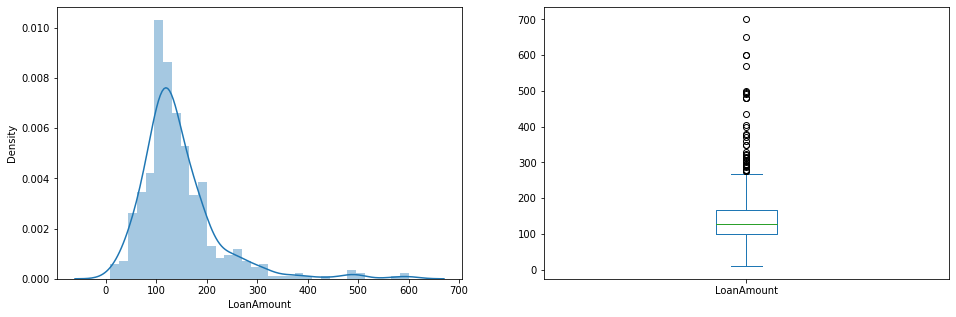

In [ ]:
plt.figure(1)
plt.subplot(121)
removeNA_df=df.dropna() # we need to remove Na in order to plot a density graph
sns.distplot(removeNA_df['LoanAmount']);

plt.subplot(122)
df['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

- outliers exist
- data is slightly right skewed

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


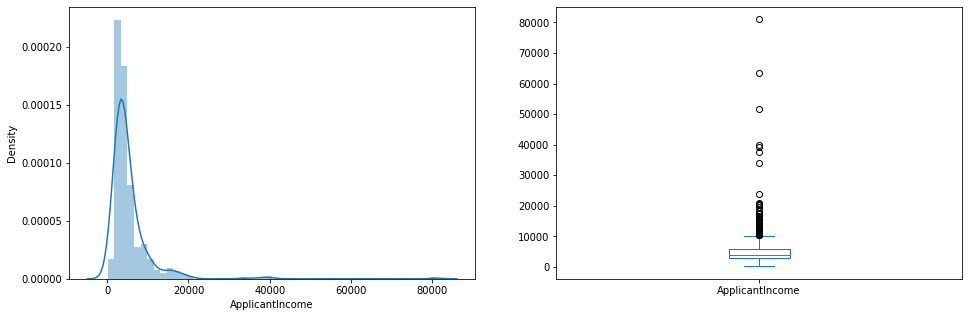

In [ ]:
plt.figure(1)
plt.subplot(121)
sns.distplot(removeNA_df['ApplicantIncome']);

plt.subplot(122)
df['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()

- outliers exist
- data is slightly right skewed

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


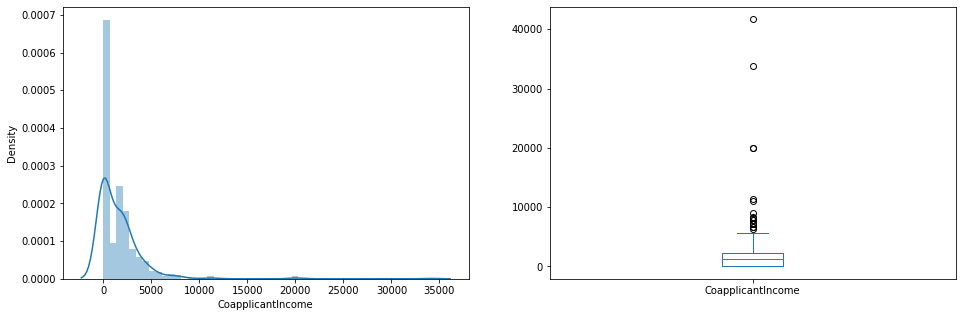

In [ ]:
plt.figure(1)
plt.subplot(121)
sns.distplot(removeNA_df['CoapplicantIncome']);

plt.subplot(122)
df['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()

- outliers exist
- data is slightly right skewed

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


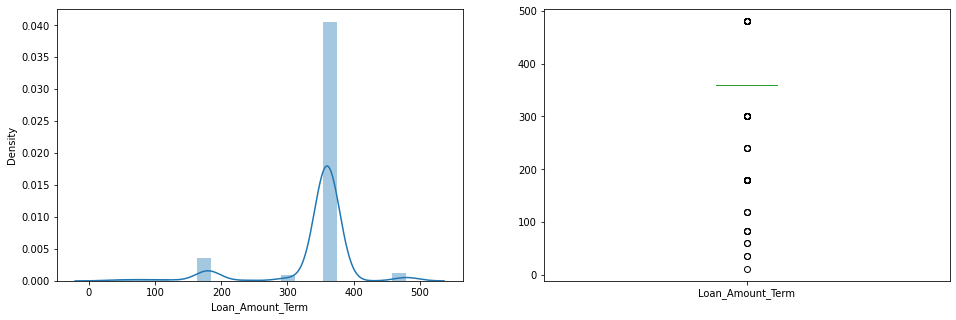

In [ ]:
plt.figure(1)
plt.subplot(121)
sns.distplot(removeNA_df['Loan_Amount_Term']);

plt.subplot(122)
df['Loan_Amount_Term'].plot.box(figsize=(16,5))

plt.show()

* Outliers Exist
* We can see that the Vast majority of the Loan_Amount_Terms are 360
* This is what we will show in the next plot.

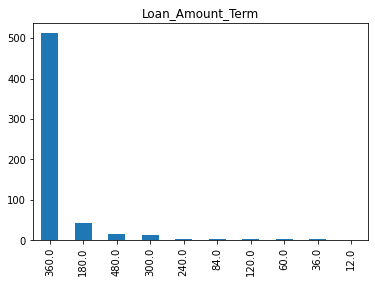

In [ ]:
df['Loan_Amount_Term'].value_counts().plot.bar( title= 'Loan_Amount_Term')
plt.show()

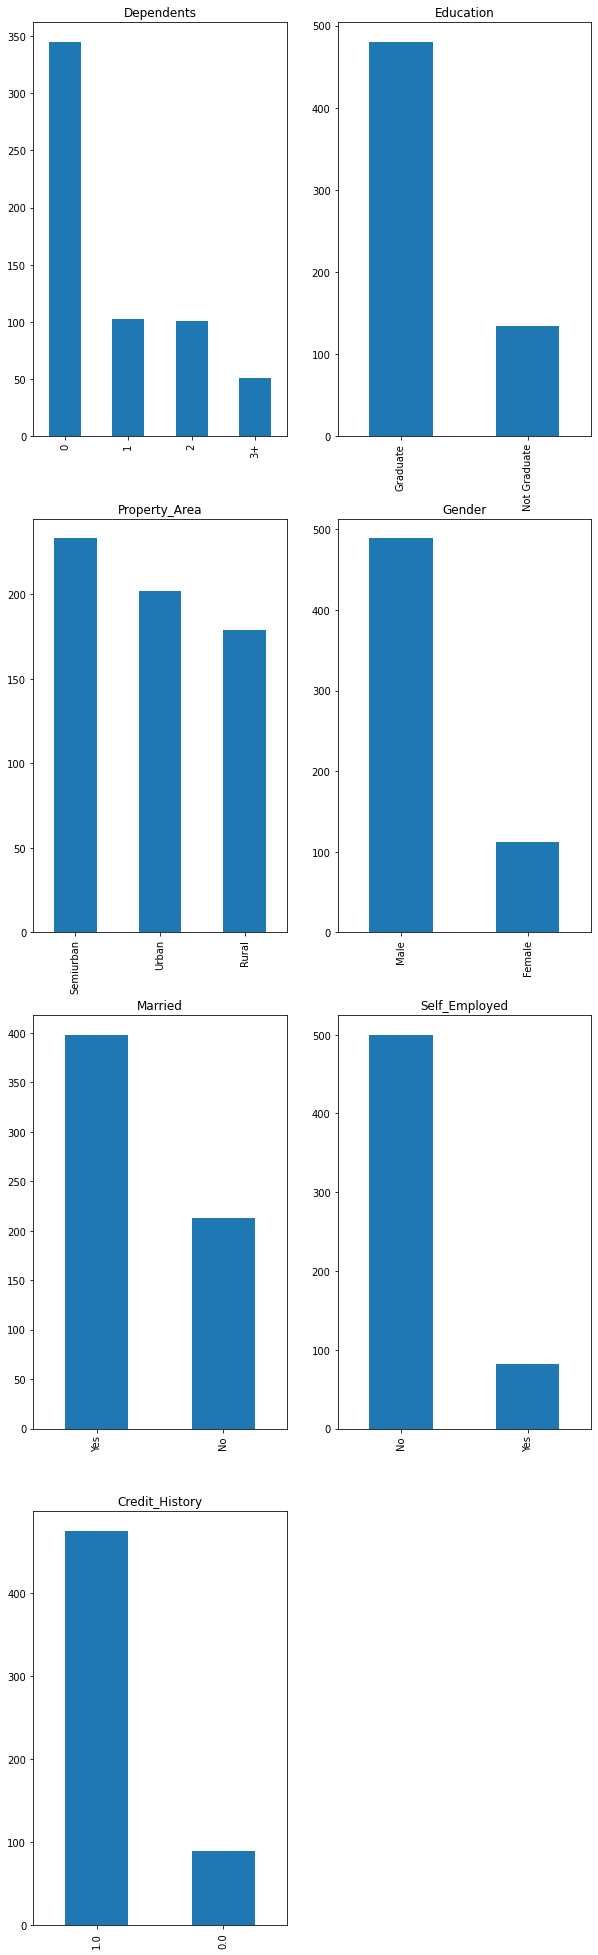

In [ ]:
plt.figure(1)

plt.subplot(421)
df['Dependents'].value_counts().plot.bar(figsize=(10,35), title= 'Dependents')

plt.subplot(422)
df['Education'].value_counts().plot.bar(title= 'Education')

plt.subplot(423)
df['Property_Area'].value_counts().plot.bar(title= 'Property_Area')

plt.subplot(424)
df['Gender'].value_counts().plot.bar(title= 'Gender')

plt.subplot(425)
df['Married'].value_counts().plot.bar(title= 'Married')

plt.subplot(426)
df['Self_Employed'].value_counts().plot.bar(title= 'Self_Employed')

plt.subplot(427)
df['Credit_History'].value_counts().plot.bar(title= 'Credit_History')

plt.show()

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


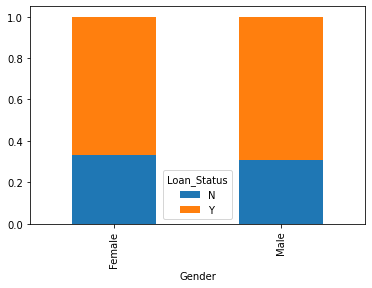

In [ ]:
Gender=pd.crosstab(df['Gender'],df['Loan_Status'])
print(Gender)
#Gender.plot(kind='bar')
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

Gender does not affect Loan_status. Slightly the same percentage of acceptance/rejection is for the 2 Genders.

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


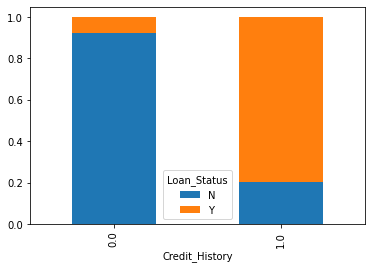

In [ ]:
Credit_History=pd.crosstab(df['Credit_History'],df['Loan_Status'])
print(Credit_History)
#Credit_History.plot(kind='bar')
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

Credit_History affects Loan_Status:
- most of people that have Credit_History=1 get a loan approval

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


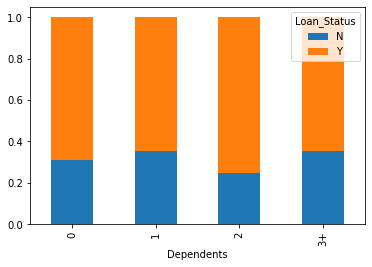

In [ ]:
Dependents=pd.crosstab(df['Dependents'],df['Loan_Status'])
print(Dependents)
#Dependents.plot(kind='bar')
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

Dependents might affect loan_status:
Accoridng to different numbers of dependents, we have some difference in percentages of accepted/rejected loans.

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


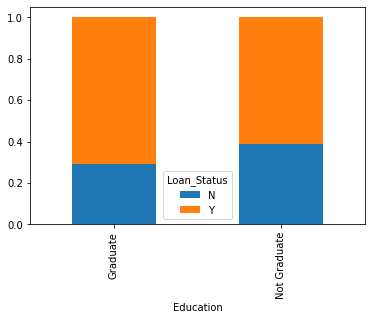

In [ ]:
Education=pd.crosstab(df['Education'],df['Loan_Status'])
print(Education)
#Education.plot(kind='bar')
Education.div(Education.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

Education affects loan_status:
- Graduate applicants have higher chance to get a loan accepted

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


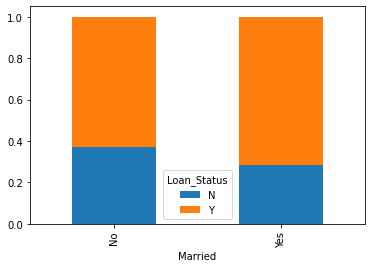

In [ ]:
Married=pd.crosstab(df['Married'],df['Loan_Status'])
print(Married)
#Married.plot(kind='bar')
Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

Marriage affects loan_status:

- Married applicants have higher chance to get a loan accepted

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


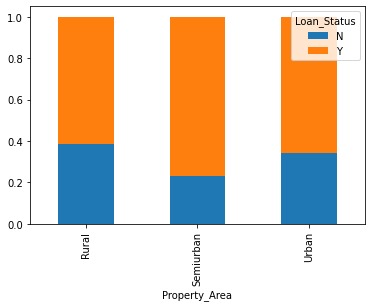

In [ ]:
Property_Area=pd.crosstab(df['Property_Area'],df['Loan_Status'])
print(Property_Area)
#Property_Area.plot(kind='bar')
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

Property_Area affects loan_status:

- Property_Area=Semiurban have higher chance to get a loan accepted

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56


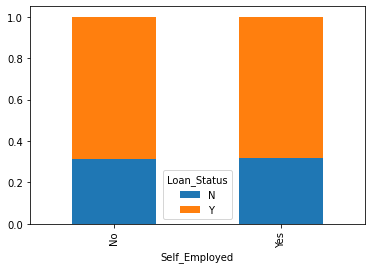

In [ ]:
Self_Employed=pd.crosstab(df['Self_Employed'],df['Loan_Status'])
print(Self_Employed)
#Self_Employed.plot(kind='bar')
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

Self_Employed does not affect the Loan status in this dataset. We have the same percentages of acceptance/rejection for Self employed and non self employed.

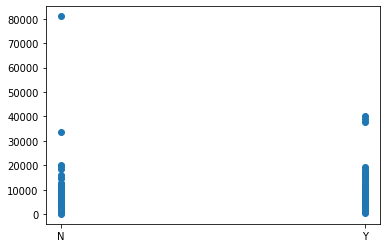

In [ ]:
plt.scatter(removeNA_df['Loan_Status'], removeNA_df['ApplicantIncome'] )

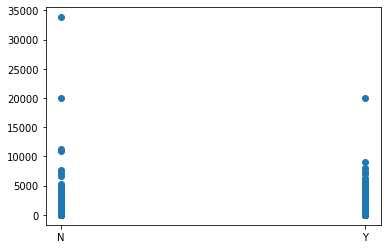

In [ ]:
plt.scatter(removeNA_df['Loan_Status'], removeNA_df['CoapplicantIncome'] )

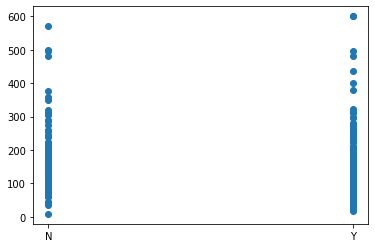

In [ ]:
plt.scatter(removeNA_df['Loan_Status'], removeNA_df['LoanAmount'] )

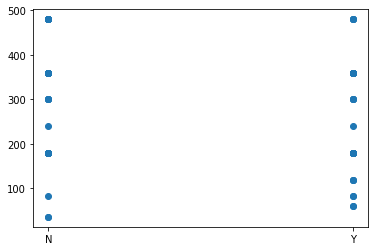

In [ ]:
plt.scatter(removeNA_df['Loan_Status'], removeNA_df['Loan_Amount_Term'] )

We cannot tell wether a specific predicator can affect Loan_Status or not using scatter plot.
Better way to specify this is either by dividing the continous data to set of ranges and then use bar plot or by using median

In [ ]:
df.groupby('Loan_Status').median() # median because Not affected with outliers

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,3833.5,268.0,129.0,360.0,1.0
Y,3812.5,1239.5,126.0,360.0,1.0


- ApplicantIncome, LoanAmount, Loan_Amount_Term have same median for both loan_status class, thus these does not affect loan_status
- CoapplicantIncome has small median when loan_status= N, thus this affect loan_status
- We already saw that Credi_History affects the Loan_Status, but the reason that we have the same median is that this variable is treated as numerical variable rather than a categorical variable, and this is why, we will change it to categorical in the next steps.

# 5. Preprocessing
"Garbage in, garbage out".
<br>
<br>
Data should be preprocessed and cleaned to get rid of noisy data. Preprocessing includes:

- remove unsued column(s)
- remove grabage data
- convert continous data into categorical
- treat missing data
- encode categorical data
- normalization: normalize data ranges for all features (e.g., between 0 and 1)

## Remove unused columns

In [ ]:
df.drop(['Loan_ID','Gender','Self_Employed','ApplicantIncome','LoanAmount','Loan_Amount_Term'], inplace=True, axis=1)

## Remove grabage data

In [ ]:
df.Dependents=df.Dependents.replace({"3+": "3"})

##Convert continous data into categorical

In [ ]:
df['Credit_History'] = df['Credit_History'].astype('O')

## Treat missing data
- fill missing categorical data & discrete data with mode
- fill missing continous data with mean


In [ ]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)

## Check if any null value exist

In [ ]:
df.isnull().sum().any()

False

## Encode categorical data

In [ ]:
le = LabelEncoder()
cat_data=df[['Credit_History','Dependents','Education','Married','Property_Area','Loan_Status']]
num_data=df[['CoapplicantIncome']]
cat_data.head()

,Credit_History,Dependents,Education,Married,Property_Area,Loan_Status
0,1.0,0,Graduate,No,Urban,Y
1,1.0,1,Graduate,Yes,Rural,N
2,1.0,0,Graduate,Yes,Urban,Y
3,1.0,0,Not Graduate,Yes,Urban,Y
4,1.0,0,Graduate,No,Urban,Y


In [ ]:
for i in cat_data:
    cat_data[i] = le.fit_transform(cat_data[i])
cat_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Credit_History,Dependents,Education,Married,Property_Area,Loan_Status
0,1,0,0,0,2,1
1,1,1,0,1,0,0
2,1,0,0,1,2,1
3,1,0,1,1,2,1
4,1,0,0,0,2,1


## Combine both cat_data and numerical_data

In [ ]:
df = pd.concat([cat_data, num_data], axis=1)
df.head()

,Credit_History,Dependents,Education,Married,Property_Area,Loan_Status,CoapplicantIncome
0,1,0,0,0,2,1,0.0
1,1,1,0,1,0,0,1508.0
2,1,0,0,1,2,1,0.0
3,1,0,1,1,2,1,2358.0
4,1,0,0,0,2,1,0.0


## Normalization

Normalize data ranges for all features (e.g., between 0 and 1)

In [ ]:
df_max = df.max() # get max per each column in dataset
df_max

Credit_History           1.0
Dependents               3.0
Education                1.0
Married                  1.0
Property_Area            2.0
Loan_Status              1.0
CoapplicantIncome    41667.0
dtype: float64

In [ ]:
df = df.divide(df_max) # divide value for each column value by max
df.describe()

,Credit_History,Dependents,Education,Married,Property_Area,Loan_Status,CoapplicantIncome
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.855049,0.248100,0.218241,0.653094,0.518730,0.687296,0.038910
std,0.352339,0.336541,0.413389,0.476373,0.393741,0.463973,0.070229
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,1.000000,0.500000,1.000000,0.028524
75%,1.000000,0.333333,0.000000,1.000000,1.000000,1.000000,0.055134
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 6. Training & Validating

We split the data between training and testing.
Then, we train a model to predict the loan status

In [ ]:
input_variables = ['Credit_History','Dependents','Education','Married','Property_Area','CoapplicantIncome']
x = df[input_variables]
y = df['Loan_Status']

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size =0.3)

##Creating & Fitting the model

In [ ]:
model=LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

##Validating the model

In [ ]:
pred_val = model.predict(x_val)
accuracy_score(y_val,pred_val)

0.8108108108108109

#7. Feature Importance

Here is how we can evaluate the feature importance in our problem.

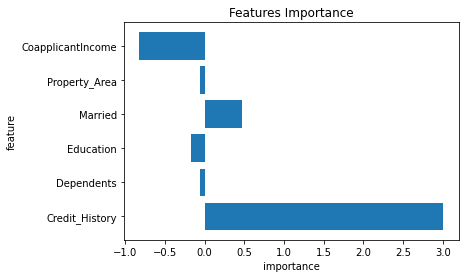

In [ ]:
columns_names = x_train.columns.values
features_importance = model.coef_
f=features_importance.flatten()
plt.barh(columns_names, f)
plt.title('Features Importance')
plt.xlabel('importance')
plt.ylabel('feature')
plt.show()

We see that the credit history is the most important feature to approve a loan.